# SpaceX 

SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each. Much of the savings is because SpaceX can reuse the first stage. Therefore, if we can determine whether the first stage will land successfully, we can specify the cost of a launch.This information can be used if an alternate company wants to bid against SpaceX for a rocket launch. Here we will use machine learning techniques to predict if the first stage will land successfully or not.

## Dataset Information

### Import All Necessary Packeges

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score
import pickle
from warnings import filterwarnings
filterwarnings('ignore')

### Reading the Dataset 

In [2]:
df=pd.read_csv('dataset_falcon9.csv')

In [3]:
df

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


### Data Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [5]:
df.shape

(90, 18)

In [6]:
df.describe(include='all')

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
count,90.000000,90,90,90.000000,90,90,90,90.000000,90,90,90,64,90.000000,90.000000,90,90.000000,90.000000,90.000000
unique,NaN,90,1,NaN,11,3,8,NaN,2,2,2,5,NaN,NaN,53,NaN,NaN,NaN
top,NaN,2010-06-04,Falcon 9,NaN,GTO,CCAFS SLC 40,True ASDS,NaN,True,False,True,5e9e3032383ecb6bb234e7ca,NaN,NaN,B1049,NaN,NaN,NaN
freq,NaN,1,90,NaN,27,55,41,NaN,70,53,71,35,NaN,NaN,6,NaN,NaN,NaN
mean,45.500000,NaN,NaN,6104.959412,NaN,NaN,NaN,1.788889,NaN,NaN,NaN,NaN,3.500000,1.655556,NaN,-86.366477,29.449963,0.666667
std,26.124701,NaN,NaN,4694.671720,NaN,NaN,NaN,1.213172,NaN,NaN,NaN,NaN,1.595288,1.710254,NaN,14.149518,2.141306,0.474045
min,1.000000,NaN,NaN,350.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,-120.610829,28.561857,0.000000
25%,23.250000,NaN,NaN,2510.750000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,0.000000,NaN,-80.603956,28.561857,0.000000
50%,45.500000,NaN,NaN,4701.500000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,4.000000,1.000000,NaN,-80.577366,28.561857,1.000000
75%,67.750000,NaN,NaN,8912.750000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,5.000000,3.000000,NaN,-80.577366,28.608058,1.000000


In [7]:
df.corr()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
FlightNumber,1.000000,0.596307,0.652842,0.442364,0.635844,0.373619,0.932411,0.735193,0.055256,-0.054194,0.401923
PayloadMass,0.596307,1.000000,0.665218,0.258011,0.468393,0.192318,0.518165,0.612327,0.016181,-0.014655,0.199992
Flights,0.652842,0.665218,1.000000,0.194457,0.782631,0.157727,0.519603,0.684802,0.085228,-0.084547,0.149787
GridFins,0.442364,0.258011,0.194457,1.000000,0.229341,0.902302,0.438023,0.410324,-0.143677,0.144427,0.642540
Reused,0.635844,0.468393,0.782631,0.229341,1.000000,0.155552,0.548036,0.594109,-0.042160,0.042669,0.207582
Legs,0.373619,0.192318,0.157727,0.902302,0.155552,1.000000,0.368994,0.375496,-0.057701,0.058161,0.673825
Block,0.932411,0.518165,0.519603,0.438023,0.548036,0.368994,1.000000,0.743340,-0.030037,0.031621,0.416015
ReusedCount,0.735193,0.612327,0.684802,0.410324,0.594109,0.375496,0.743340,1.000000,-0.101877,0.102668,0.466584
Longitude,0.055256,0.016181,0.085228,-0.143677,-0.042160,-0.057701,-0.030037,-0.101877,1.000000,-0.999966,-0.089519
Latitude,-0.054194,-0.014655,-0.084547,0.144427,0.042669,0.058161,0.031621,0.102668,-0.999966,1.000000,0.090782


### Missing Values Analysis

In [8]:
missing_values=df.isnull().sum().sort_values(ascending=False)
percent_missing=(missing_values/len(df))*100
percent_missing_round=(round(percent_missing, 1)).sort_values(ascending=False)
missing_data=pd.concat([missing_values,percent_missing_round],axis=1,keys=['Total','Percent(%)'])
print(missing_data)

                Total  Percent(%)
LandingPad         26        28.9
FlightNumber        0         0.0
Date                0         0.0
Latitude            0         0.0
Longitude           0         0.0
Serial              0         0.0
ReusedCount         0         0.0
Block               0         0.0
Legs                0         0.0
Reused              0         0.0
GridFins            0         0.0
Flights             0         0.0
Outcome             0         0.0
LaunchSite          0         0.0
Orbit               0         0.0
PayloadMass         0         0.0
BoosterVersion      0         0.0
Class               0         0.0


## Exploratory Data Analysis (EDA)

### Categorical Features vs. Target Variable (Class)

In [9]:
Categorical=[]
for col in df.columns:
    Categorical.append(col.strip())
df.columns=Categorical

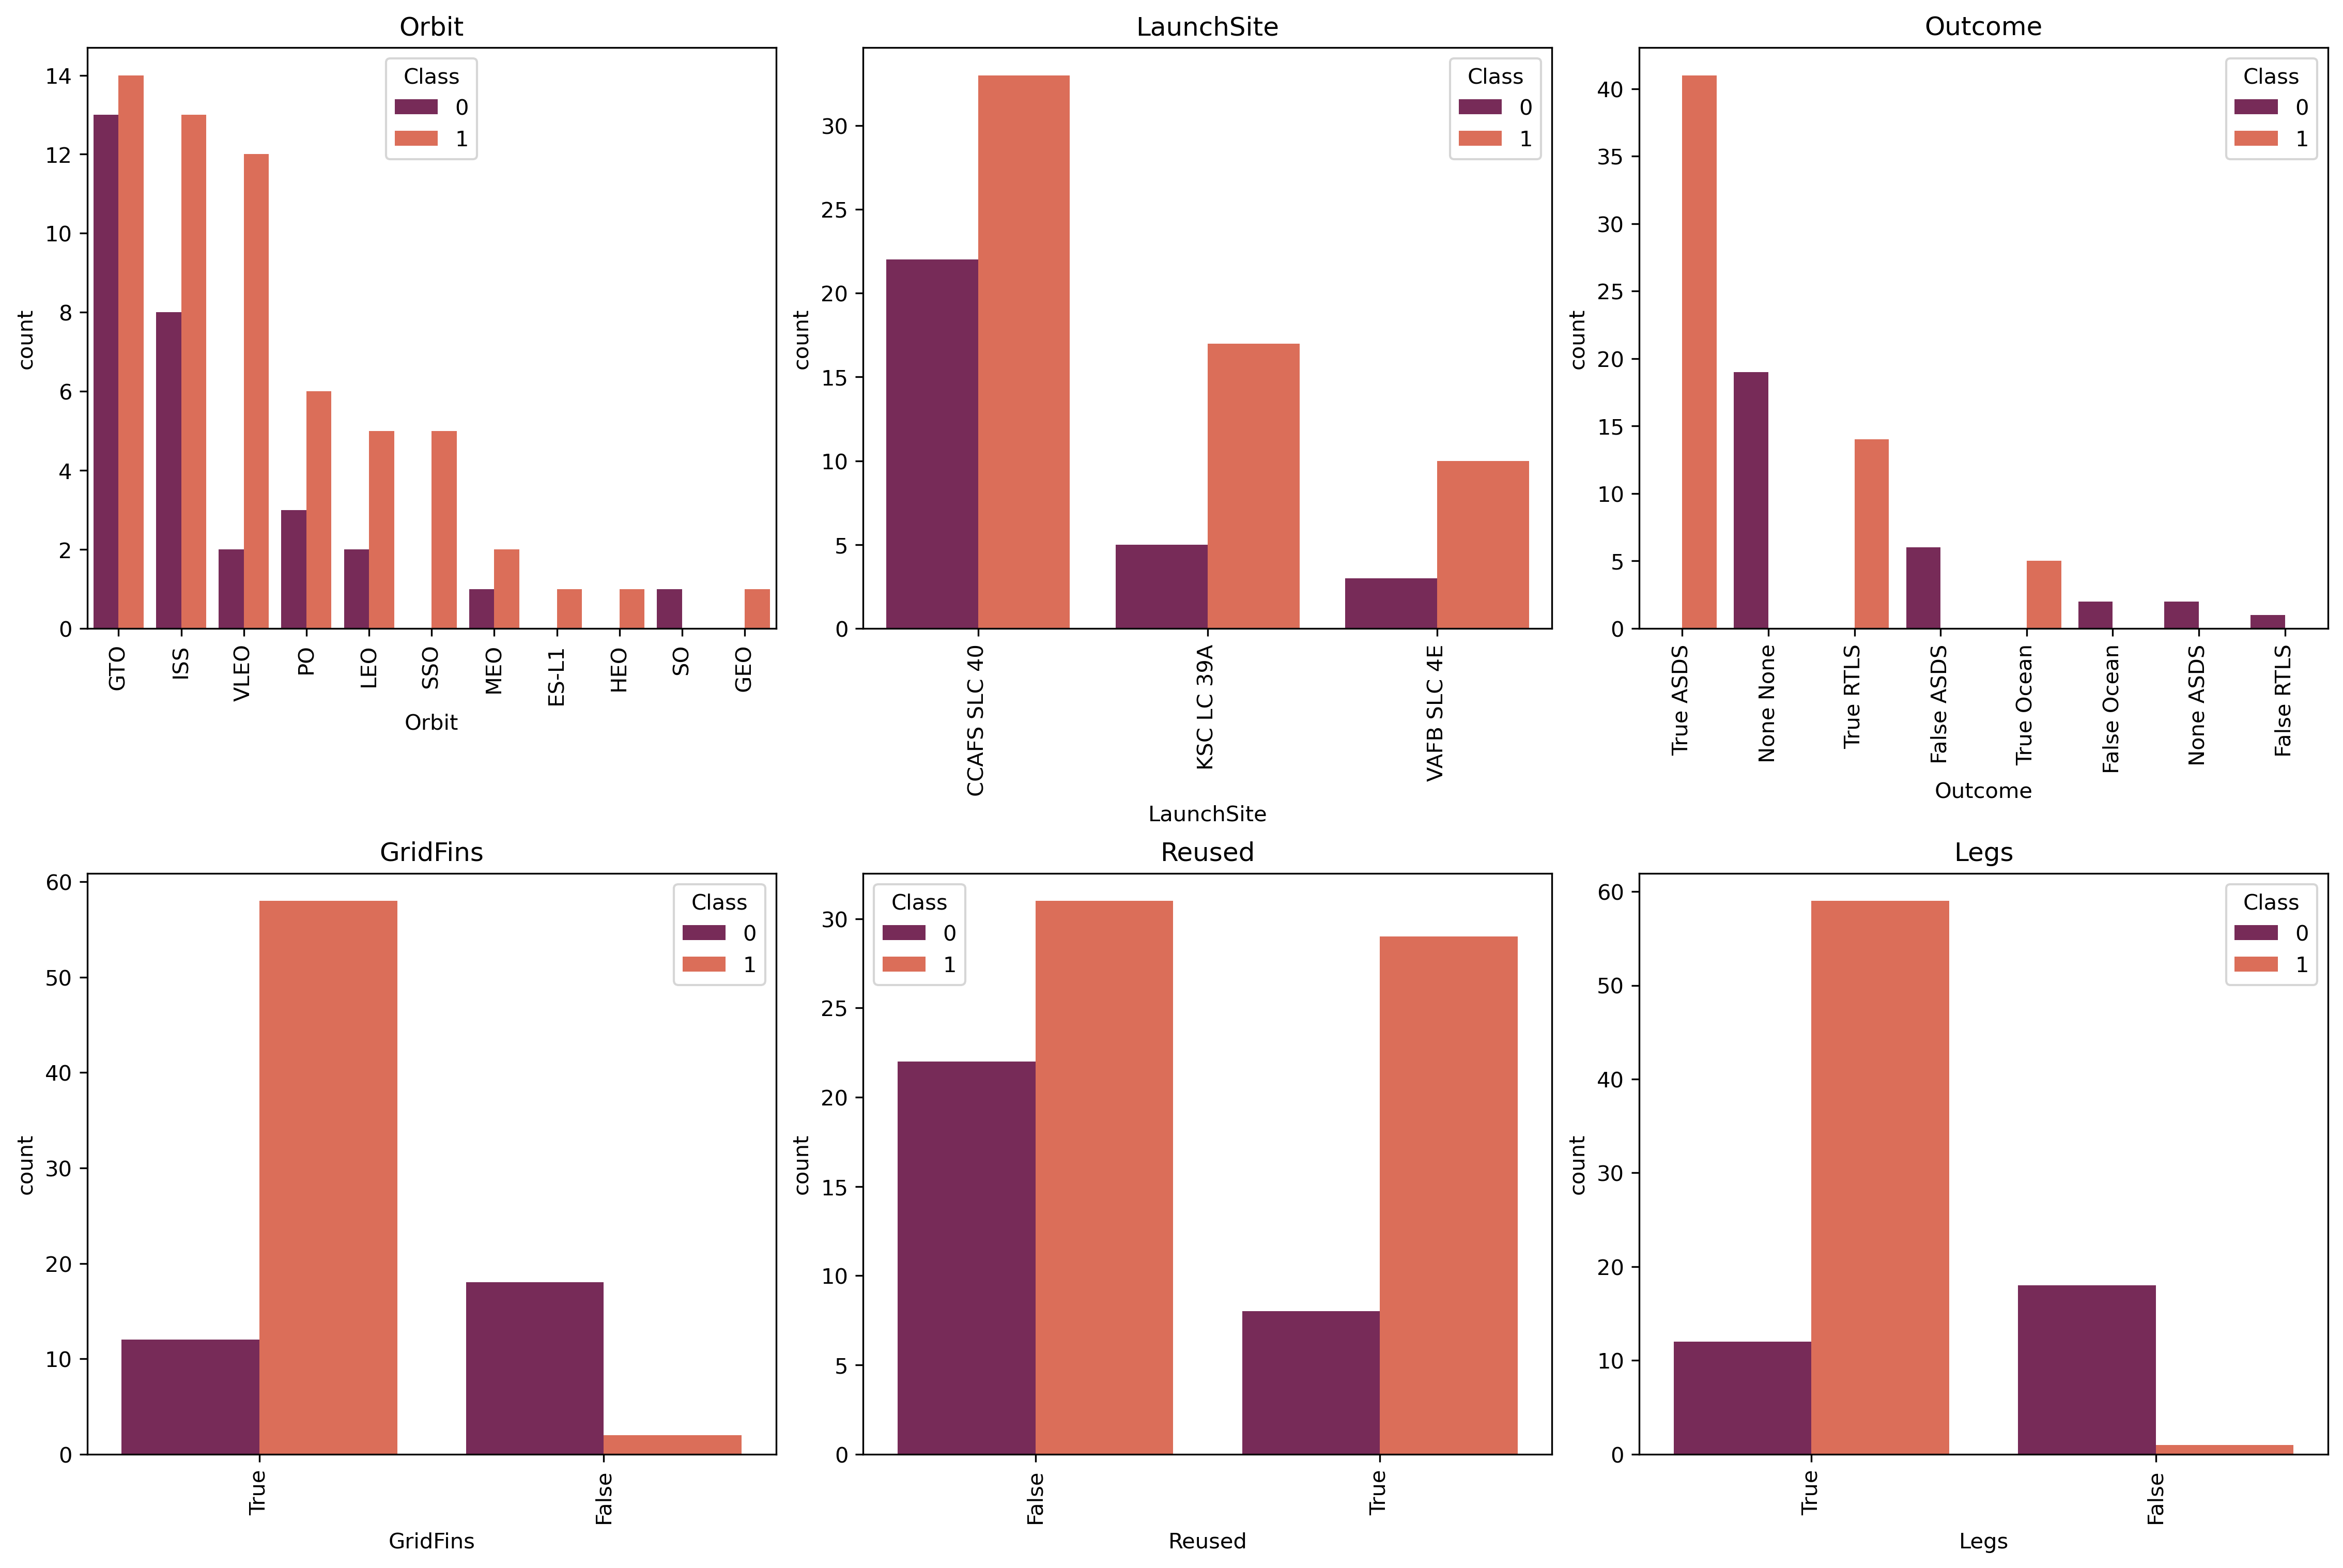

In [10]:
Categorical=['Orbit','LaunchSite','Outcome','GridFins','Reused','Legs']
plt.figure(figsize=(15,10),dpi=300,layout='constrained')
for i,j in enumerate(Categorical):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df,x=j,hue='Class',palette='rocket',order=df[j].value_counts().index)
    plt.title(j)
    plt.xticks(rotation=90)

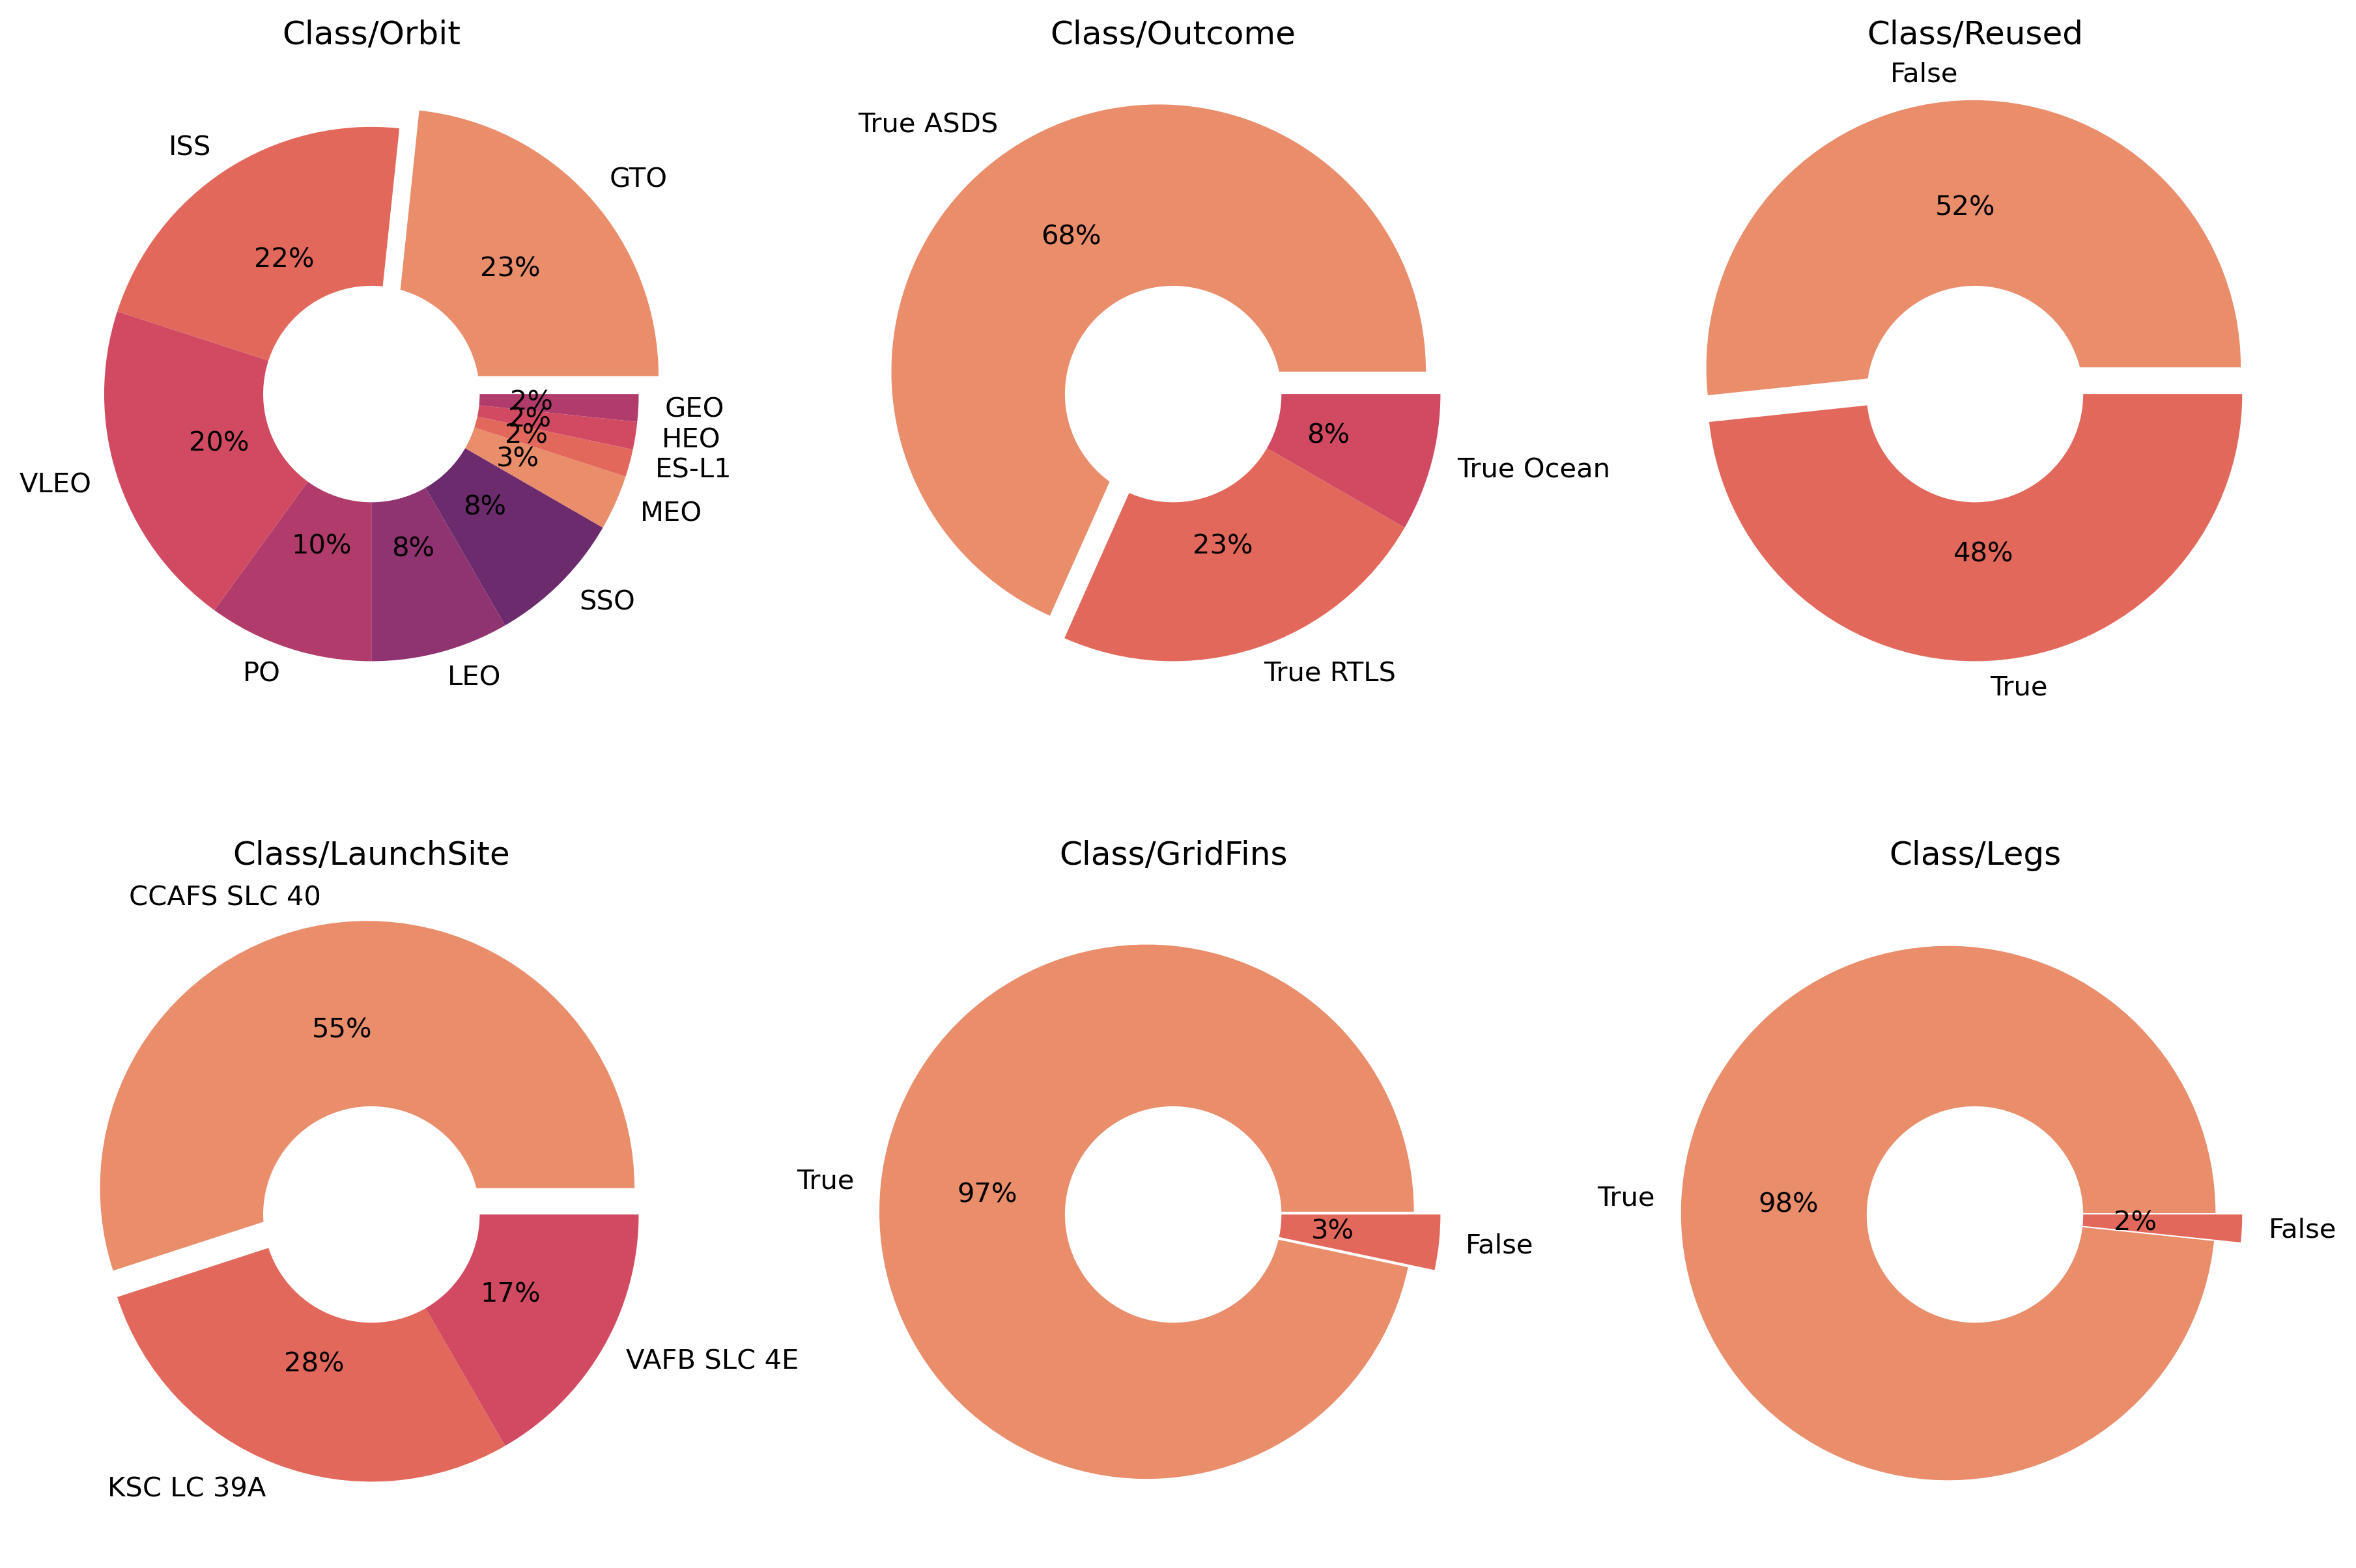

In [11]:
Categorical=['Orbit','LaunchSite','Outcome','GridFins','Reused','Legs']
rows=2
cols=3
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(15,10),dpi=300)
colors=sns.color_palette('flare')
for i,j in enumerate(Categorical):
    row=i%rows
    col=i//rows
    df_pie=df[[j,'Class']]
    df_pie=df_pie[df['Class']==1]
    labels=df_pie[j].value_counts().index
    data=df_pie[j].value_counts().values
    max_value=max(df_pie[j].value_counts().values)
    explode=[0.1*int(i/max_value) for i in data]
    ax[row,col].set_title('Class/{}'.format(j))
    ax[row,col].pie(data,labels=labels,autopct='%.0f%%',explode=explode,colors=colors)
    inner_circle=plt.Circle((0,0),0.4,color='white')
    ax[row,col].add_artist(inner_circle)

### Numerical Features vs. Target Variable (Class)

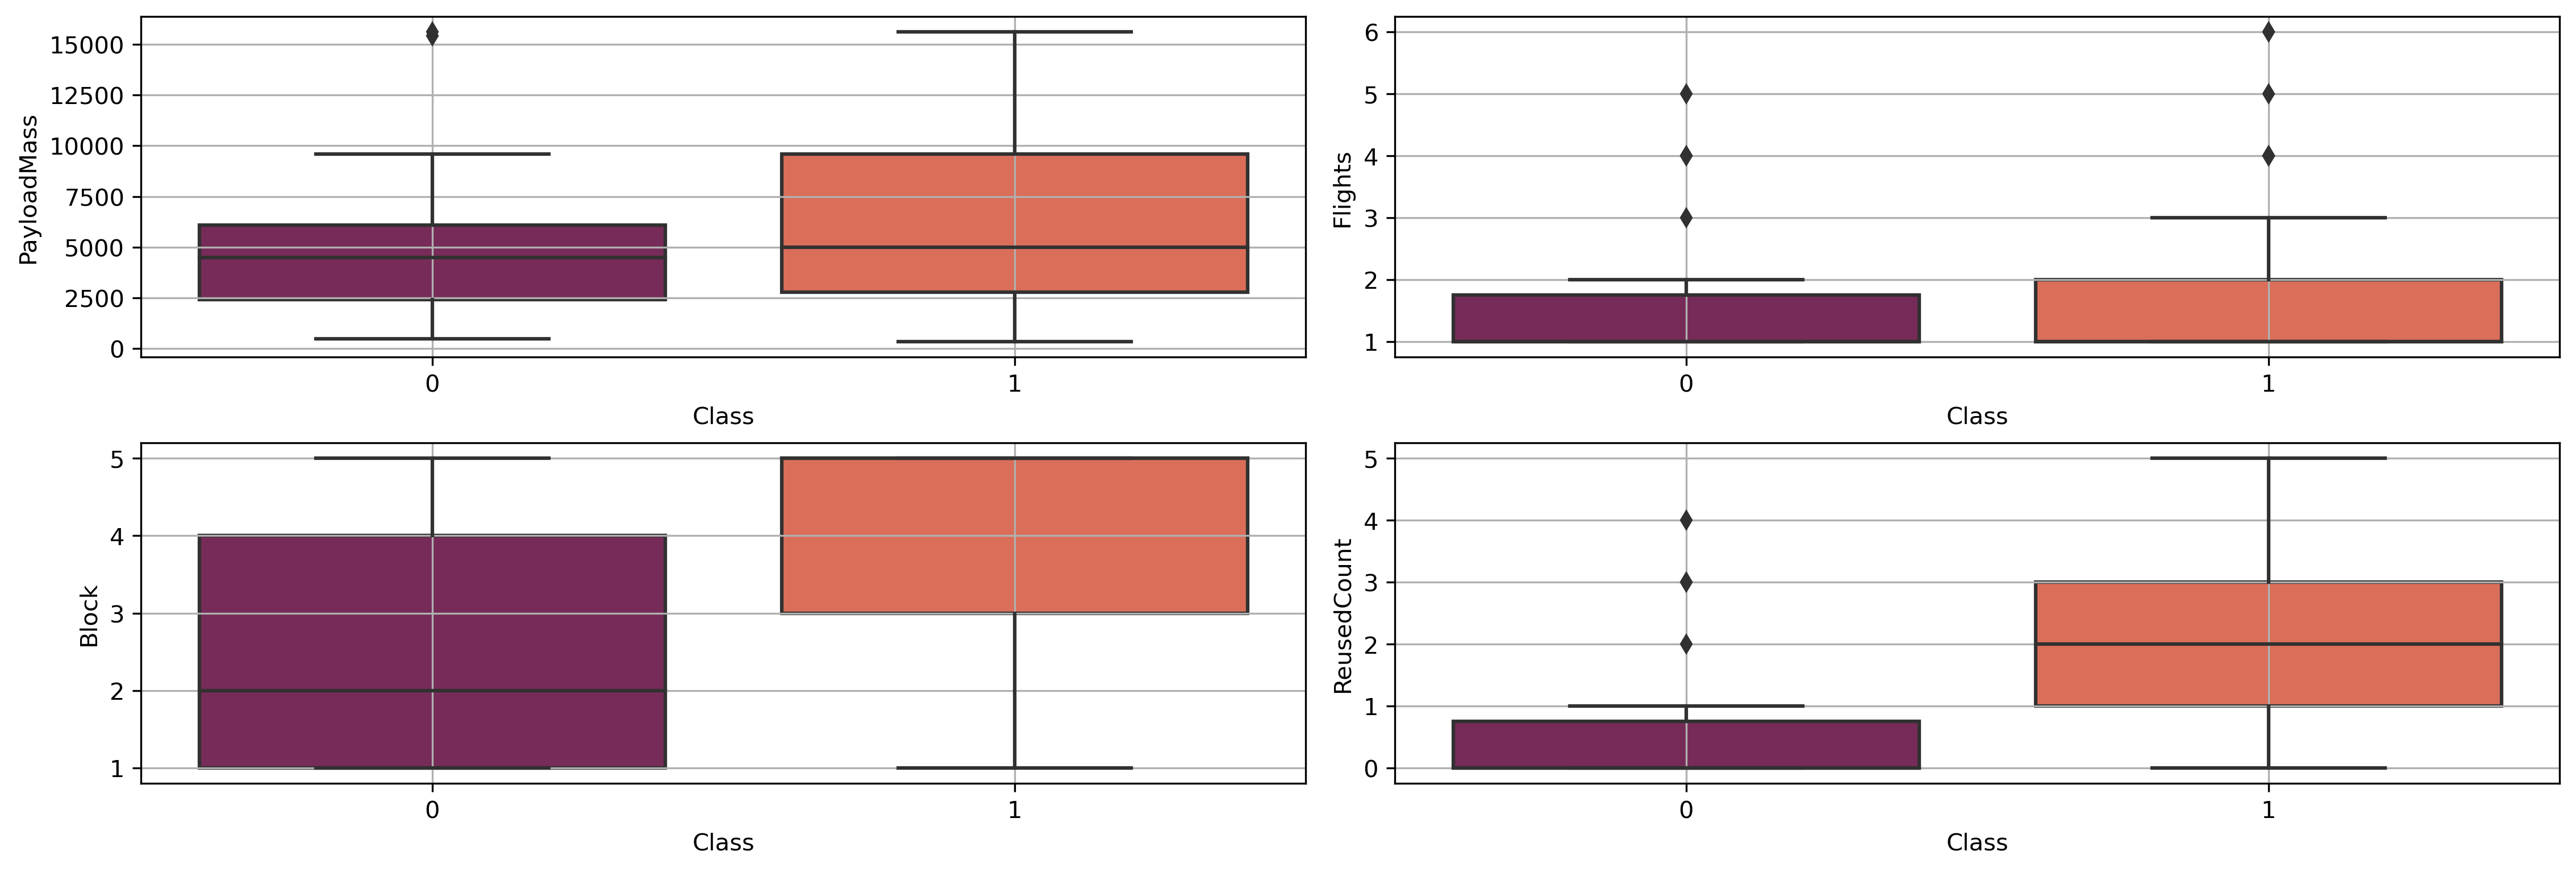

In [12]:
Numerical=['PayloadMass','Flights','Block','ReusedCount']
plt.figure(figsize=(15,5),dpi=300,layout='constrained')
for i,j in enumerate(Numerical):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df,y=j,x='Class',palette='rocket')
    plt.grid()

## Preprocessing

### Cleaning

#### Preparing Outcome Column

The dataset documentation indicates that the 'Outcome' column comprises two components: the first part denotes the landing status, while the second part describes the type of landing location (such as ocean, grounds pad, etc.). This structure suggests a potential overlap with the target column, which could result in data leakage. To address this, the column is split into two parts, with the first part being removed and the second part added to the dataframe.

In [13]:
df['Outcome'].value_counts()

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [14]:
df['Outcome']=df['Outcome'].apply(lambda x: x.split())

In [15]:
df['New_Outcome']=df['Outcome'].apply(lambda x: x[1])

#### Removing Unnecessary Features 

Columns such as 'FlightNumber' or 'Date' do not contain valuable information for the analysis purpose, therefore are considered for removal.

In [16]:
df=df.drop(['FlightNumber','Date','BoosterVersion','Outcome','LandingPad','Serial','Longitude','Latitude'],axis=1)

### Feature Engineering

The dummy method has been used to convert non-numeric columns to numeric.

In [17]:
df_dummy=pd.get_dummies(df[['Orbit','LaunchSite','New_Outcome']])

In [18]:
df=df.drop(['Orbit','LaunchSite','New_Outcome'],axis=1)

The boolean variables are converted using the 'astype' method to cast them into integers.

In [19]:
df['GridFins']=df['GridFins'].astype(int)
df['Reused']=df['Reused'].astype(int)
df['Legs']=df['Legs'].astype(int)

In [20]:
df=pd.concat([df,df_dummy],axis=1)

### Preprocessed Data

In [21]:
df.to_csv('SpaceX_Preprocessed_Data.csv')

### Dropping the Target

In [22]:
X=df.drop('Class',axis=1)
Y=df['Class']

### Standardizing Values

The inconsistency in the order of variables can lead to errors in machine prediction. To address this issue, the StandardScaler method is employed for standardizing the independent variables. This ensures that all variables undergo a transformation where they have a mean of zero and a standard deviation of one.

In [23]:
transform=preprocessing.StandardScaler()
X_scaled=transform.fit_transform(X)

In [24]:
col=X.columns
X=pd.DataFrame(X_scaled,columns=col)

## Modeling

### Splitting Data

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=101)

This function is utilized to visualize the confusion matrix values generated by various machine learning methods through a heatmap plot.

In [26]:
def plot_confusion_matrix (Y,Y_predicted,model_name):
    cm=confusion_matrix(Y,Y_predicted)
    sns.heatmap(data=cm,annot=True,xticklabels=['did not land','landed'],yticklabels=['did not land','landed'])
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual Lablels')
    plt.title('Confusion Matrix for {} model'.format(model_name))

### The subsequent cells cover the following tasks:
#### A) Selecting four machine learning models, which include:         
1. Logistic Regression        
2. Support Vector Machine       
3. K Nearest Neighbors       
4. Decision Tree        

#### B) Tuning hyperparameters for each model
#### C) Evaluating the performance of each model 

In [27]:
LR=LogisticRegression()
SVM=SVC()
KNN=KNeighborsClassifier()
DT=DecisionTreeClassifier(random_state=101)


list_model=[LR,SVM,KNN,DT]
LR_param={'C':[0.01,0.1,1],'solver':['lbfgs'],'penalty':['l2']}
KNN_param={'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2]}
SVM_param={'C':[0.5,1,1.5],'kernel':['rbf','poly','sigmoid']}
DT_param={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[2*n for n in range(1,10)],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4],'max_features':['auto','sqrt']}


param={LR:LR_param,SVM:SVM_param,KNN:KNN_param,DT:DT_param}
list_model_name={LR:'Logistic Regression',SVM:'Support Vector Machine',KNN:'K Nearest Neighbor',DT:'Decision Tree'}
acc_success={}
acc_fail={}
best_param={}

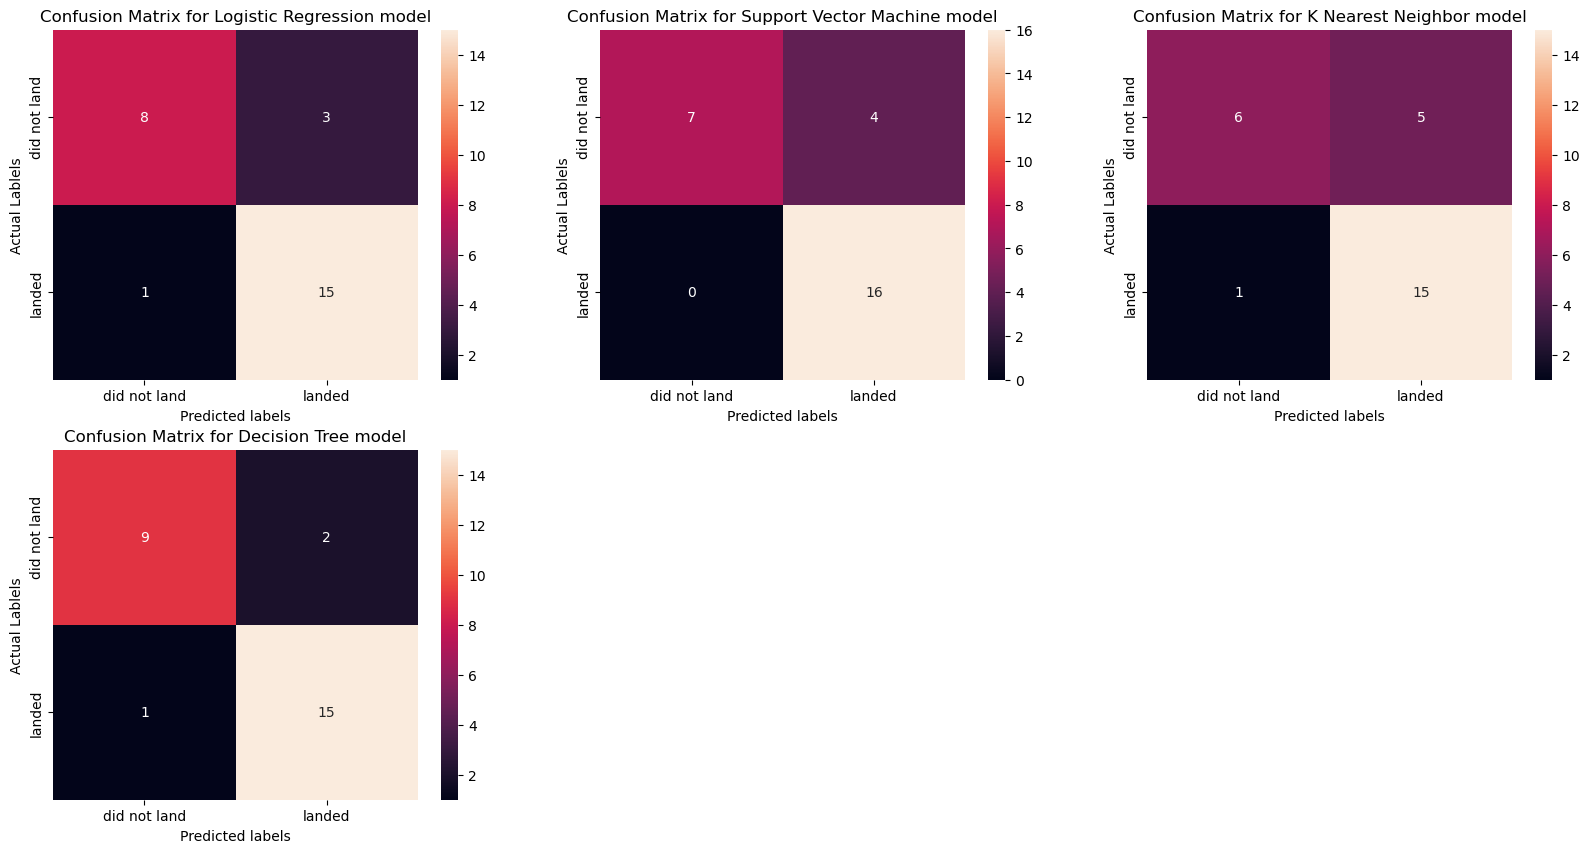

In [28]:
plt.figure(figsize=(20,10),dpi=100)
index=1
for m in list_model:
    model_cv=GridSearchCV(m,param[m],cv=10)
    model_cv.fit(X_train,Y_train)
    Y_predict=model_cv.predict(X_test)
    cr=classification_report(Y_test,Y_predict ,output_dict=True)
    cr['1'].update({'accuracy':cr['accuracy']})
    cr['0'].update({'accuracy':cr['accuracy']})
    acc_success[list_model_name[m]]=cr['1']
    acc_fail[list_model_name[m]]=cr['0']
    plt.subplot(2,3,index)
    plot_confusion_matrix(Y_test,Y_predict,list_model_name[m])
    best_param[list_model_name[m]]=model_cv.best_params_
    index+=1

### Performance Metrics

The following table and bar chart demonstrate performance metrics for evaluating the successful landing state of all four models simultaneously.

In [29]:
df_acc_success=pd.DataFrame(acc_success)
df_acc_success=df_acc_success.drop('support',axis=0)
df_acc_success

,Logistic Regression,Support Vector Machine,K Nearest Neighbor,Decision Tree
precision,0.833333,0.800000,0.750000,0.882353
recall,0.937500,1.000000,0.937500,0.937500
f1-score,0.882353,0.888889,0.833333,0.909091
accuracy,0.851852,0.851852,0.777778,0.888889


<AxesSubplot:>

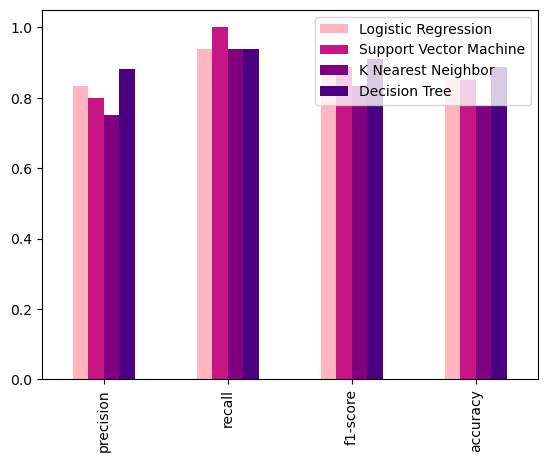

In [30]:
df_acc_success.plot.bar(color=['lightpink','mediumvioletred','purple','indigo'])

The following table and bar chart illustrate performance metrics for evaluating the unsuccessful landing state of all four models side by side.

In [31]:
df_acc_fail=pd.DataFrame(acc_fail)
df_acc_fail=df_acc_fail.drop('support',axis=0)
df_acc_fail

,Logistic Regression,Support Vector Machine,K Nearest Neighbor,Decision Tree
precision,0.888889,1.000000,0.857143,0.900000
recall,0.727273,0.636364,0.545455,0.818182
f1-score,0.800000,0.777778,0.666667,0.857143
accuracy,0.851852,0.851852,0.777778,0.888889


<AxesSubplot:>

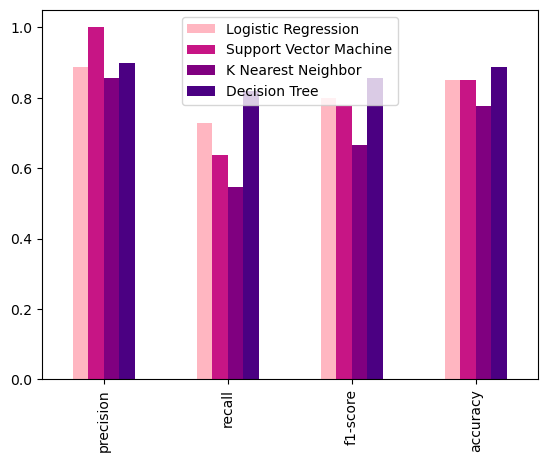

In [32]:
df_acc_fail.plot.bar(color=['lightpink','mediumvioletred','purple','indigo'])

### ROC Curve

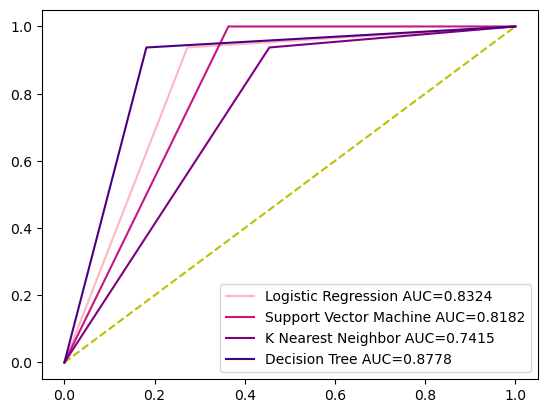

In [33]:
plt.plot([0,1],[0,1],'y--')
colors=['lightpink','mediumvioletred','purple','indigo']
for m in list_model:
    model_cv=GridSearchCV(m,param[m],cv=10)
    model_cv.fit(X_train,Y_train)
    Y_predict=model_cv.predict(X_test)
    fpr,tpr,thresholds= roc_curve(Y_test,Y_predict)
    auc=round(roc_auc_score(Y_test,Y_predict),4)
    plt.plot(fpr,tpr,label=list_model_name[m]+' AUC='+str(auc),color=colors.pop(0))
    plt.legend()

### Best Hyperparameters for Each Model

In [34]:
df_best_param=pd.DataFrame(best_param)
df_best_param

,Logistic Regression,Support Vector Machine,K Nearest Neighbor,Decision Tree
C,0.1,0.5,NaN,NaN
penalty,l2,NaN,NaN,NaN
solver,lbfgs,NaN,NaN,NaN
kernel,NaN,sigmoid,NaN,NaN
algorithm,NaN,NaN,auto,NaN
n_neighbors,NaN,NaN,7,NaN
p,NaN,NaN,2,NaN
criterion,NaN,NaN,NaN,entropy
max_depth,NaN,NaN,NaN,6
max_features,NaN,NaN,NaN,auto


### Exporting the Best Model

In [35]:
DT_CV=DecisionTreeClassifier(criterion='entropy',max_depth=6,max_features='auto',min_samples_leaf=1,min_samples_split=2,splitter='best')
DT_CV.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto')

In [36]:
pickle.dump(DT_CV,open('SpaceX.pk1','wb'))